In [19]:
# import pandas and BeautifulSoup
import pandas as pd
from bs4 import BeautifulSoup

In [20]:
#load page source
with open("monzo.html") as html_code:
    soup = BeautifulSoup(html_code,'lxml')

In [21]:
# assign the html to a new tag html_tag = soup.html
html_tag = soup.html

<html class="js-focus-visible" data-js-focus-visible="" dir="ltr" lang="en"><head><script async="" crossorigin="anonymous" integrity="sha384-/lfxU6PNOSdu+yg5CQ6Bqs112JrNtnIi8akxhIvAwfYc7bAJg4scSN/mdhay2j5Y" nonce="" src="https://www.gstatic.com/recaptcha/releases/gZWLhEUEJFxEhoT5hpjn2xHK/recaptcha__en.js" type="text/javascript"></script><script async="" nonce="" src="https://www.google-analytics.com/analytics.js"></script><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v2.ico" rel="shortcut icon"/><script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.fQLVS3SAB_U.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9-gtqpJORJvBFDdao_eAhWe8xjHw/cb=gapi.loaded_0"></script><s
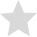
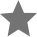
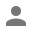
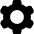
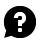
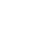
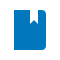
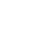
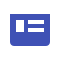
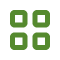
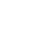
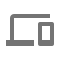
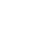
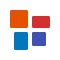
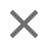
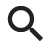
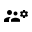
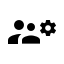
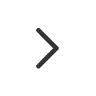
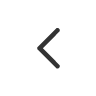
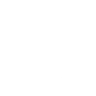
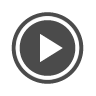
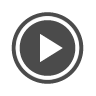
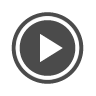
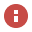
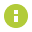
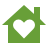
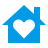
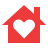
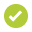
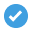
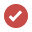
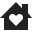
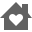
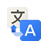
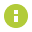
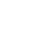
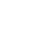
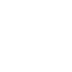
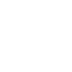

In [22]:
# check the content in the html_tag
html_tag

In [23]:
# fetch all contents by targeting jscontroller="H6eOGe"
html_data = html_tag.find_all(jscontroller="H6eOGe")
html_data

[<div jscontroller="H6eOGe" jsdata="yf3HXc;gp:AOqpTOF57S3ifyoWsU14HBYjnmv5l1WAe8BXszhraIg0EE7ZaEOgSuPZTw3jkm9GzPwZ1-geB7LUv0bS1hgFBpM;$194 YjFXEf;_;$195" jsmodel="y8Aajc"><div class="zc7KVe"><div aria-hidden="true" class="vDSMeb bAhLNe"><img aria-hidden="true" class="T75of ZqMJr" data-atf="false" src="https://play-lh.googleusercontent.com/a/AATXAJxwLLD72z5iMErkaIORUIAn3l2tMB2blpLUV2Oa=w48-h48-n-rw-mo" srcset="https://play-lh.googleusercontent.com/a/AATXAJxwLLD72z5iMErkaIORUIAn3l2tMB2blpLUV2Oa=w96-h96-n-rw-mo 2x"/></div><div class="d15Mdf bAhLNe"><div class="xKpxId zc7KVe"><div class="bAhLNe kx8XBd"><span class="X43Kjb">Richard Thompson</span><div><span class="nt2C1d"><div class="pf5lIe"><div aria-label="Rated 5 stars out of five stars" role="img"><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div><div class="vQHuPe bUWb7c"></div></div></div></span><span class="p2TkOb">February 22, 2022</span></div></div><d

In [9]:
#set values
Prod = 'Monzo'
OStype = 'Android'
#declare the list
the_avatar = []
the_posting_date=[]
the_cusname=[]
the_cust_rating=[]
the_cus_comment = []
the_cus_comment_Full = []
the_cus_comment_Final = []
the_customercareRsp = []
the_responded_date = []
the_respondedby = []
the_num_of_postLikes = []
the_OStype = []
the_Prod = []

# get the total number review contents found in the jscontroller="H6eOGe" tag
n = len(html_data)
for i in range(0, n):
    #avatar
    avatar = html_data[i].find('img')["src"]
    the_avatar.append(avatar)
    #date
    posting_date = html_data[i].find('span', class_="p2TkOb").string
    the_posting_date.append(posting_date)
    #cusname
    cusname = html_data[i].find('span', class_="X43Kjb").string
    the_cusname.append(cusname)
    # aria-label  aria-label
    cr = html_data[i].find('div', class_="pf5lIe")
    cust_rating = cr.div['aria-label'].replace("stars out of five stars", "").replace("Rated","")
    the_cust_rating.append(cust_rating)
    #comment
    cus_comment = html_data[i].find(jsname = 'bN97Pc').text
    the_cus_comment.append(cus_comment)
    
    #comment_full
    cus_comment_full = html_data[i].find(jsname = 'fbQN7e').text
    the_cus_comment_Full.append(cus_comment_full)
    
    #final comment
    first = len(cus_comment)
    second = len(cus_comment_full)
    
    if second > first:
        the_cus_comment_Final.append(cus_comment_full)
    else:
        the_cus_comment_Final.append(cus_comment)
    
    #number of postlikes
    post_likes = html_data[i].find('div', class_="jUL89d y92BAb").text
    the_num_of_postLikes.append(post_likes)
    #CustomerCareRsp
    try:
        sr = html_data[i].find('div', class_="LVQB0b")
        customercareRsp = sr.next_element.next_element.next_element.next_element.next_element.next_element.next_element
        the_customercareRsp.append(customercareRsp)
        responded_date = sr.find('span', class_="p2TkOb").text
        the_responded_date.append(responded_date)
        respondedby = sr.find('span', class_="X43Kjb").text
        the_respondedby.append(respondedby)
        the_OStype.append(OStype)
        the_Prod.append(Prod)
    except:
        customercareRsp = ""
        the_customercareRsp.append(customercareRsp)
        responded_date = ""
        the_responded_date.append(responded_date)
        respondedby = ""
        the_respondedby.append(respondedby)
        the_OStype.append(OStype)
        the_Prod.append(Prod)


In [24]:
# what is the total number of reviews gotten
print(f"The total number of reviews gotten is {n}")

The total number of reviews gotten is 204


In [25]:
#Set up a data frame for the list
data = {
    "Avatar": the_avatar,
    "CusNames": the_cusname,
    "Rating": the_cust_rating,
    "PostDate":the_posting_date,
    "CustomerFullComment":the_cus_comment_Final,
    "CusPostlikes":the_num_of_postLikes,
    "Rsp":the_customercareRsp,
    "Rsp_date":the_responded_date,
    "Rsp_by":the_respondedby,
    "Product":the_Prod,
    "OStype":the_OStype
}
#pass the data variable to form the data frame
ds = pd.DataFrame.from_dict(data)
# display 10 items
ds.head(10)

Avatar          CusNames Rating  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...  Richard Thompson     5    
1  https://play-lh.googleusercontent.com/a-/AOh14...          Tim Lake     5    
2  https://play-lh.googleusercontent.com/a/AATXAJ...      Jonny Andrew     3    
3  https://play-lh.googleusercontent.com/a-/AOh14...      Jason Fowell     3    
4  https://play-lh.googleusercontent.com/a-/AOh14...    Elliot Higgins     1    
5  https://play-lh.googleusercontent.com/a-/AOh14...         Anthony H     5    
6  https://play-lh.googleusercontent.com/a-/AOh14...  edwinah mugwangi     1    
7  https://play-lh.googleusercontent.com/a-/AOh14...       Seumas Grey     1    
8  https://play-lh.googleusercontent.com/a/AATXAJ...       Albi Antony     5    
9  https://play-lh.googleusercontent.com/a-/AOh14...      Jake Andrews     1    

            PostDate                                CustomerFullComment  \
0  February 22, 2022  The Monzo app is brilliant for budgeting. You ...   
1   January 24, 2022  Everything is easy and fast. Since switching f...   
2   January 29, 2022  Nowadays I am always getting lost in the app. ...   
3      April 1, 2022  Used to be perfect and there is a lot still gr...   
4      April 2, 2022                Don't use they have stolen my wages   
5      April 2, 2022                                  great banking app   
6      April 2, 2022  I am stuck, I am unable to upload my video con...   
7      April 2, 2022  The app itself is really good. Problem is if y...   
8      April 2, 2022                     Very good bank and application   
9      April 2, 2022  App doesn't work properly. Glitch on invoices ...   

  CusPostlikes                                                Rsp  \
0          112                                                      
1           41                                                      
2           65                                                      
3            9                                                      
4            0                                                      
5            0                                                      
6            0  Hey Edwinah 👋 We're sorry to hear you're havin...   
7            0                                                      
8            0                                                      
9            0                                                      

        Rsp_date Rsp_by Product   OStype  
0                         Monzo  Android  
1                         Monzo  Android  
2                         Monzo  Android  
3                         Monzo  Android  
4                         Monzo  Android  
5                         Monzo  Android  
6  April 2, 2022  Monzo   Monzo  Android  
7                         Monzo  Android  
8                         Monzo  Android  
9                         Monzo  Android

In [26]:
#write to file
ds.to_csv('your path'+ Prod +'.csv' , index=False)